# About this Report

This report is copy of Benchmark V4 with focus on Gurobi with different timeout value.

## Benchmark Result

In [1]:
# Import Object from result.json
import json

with open('result_gurobi.json') as f:
    data = json.load(f)

print(data[:1])

[{'nodes': 12, 'time_model_formulation': 0.02633810043334961, 'solvers_results': [{'name': 'Brute Force', 'objective': 919, 'execution_time': 100.00000524520874, 'total_time': 100.00000524520874}, {'name': 'Gurobi 10s', 'objective': 912.0, 'execution_time': 0.117331, 'total_time': 10.045268058776855}, {'name': 'Gurobi 100s', 'objective': 908.0, 'execution_time': 11.687376, 'total_time': 100.44855499267578}, {'name': 'Gurobi 1000s', 'objective': 898.0, 'execution_time': 275.449305, 'total_time': 378.2860219478607}, {'name': 'Gurobi 10000s', 'objective': 898.0, 'execution_time': 305.40574, 'total_time': 382.586923122406}]}]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

### Success Count by Solver vs $n$

Similar result with previous benchmark.

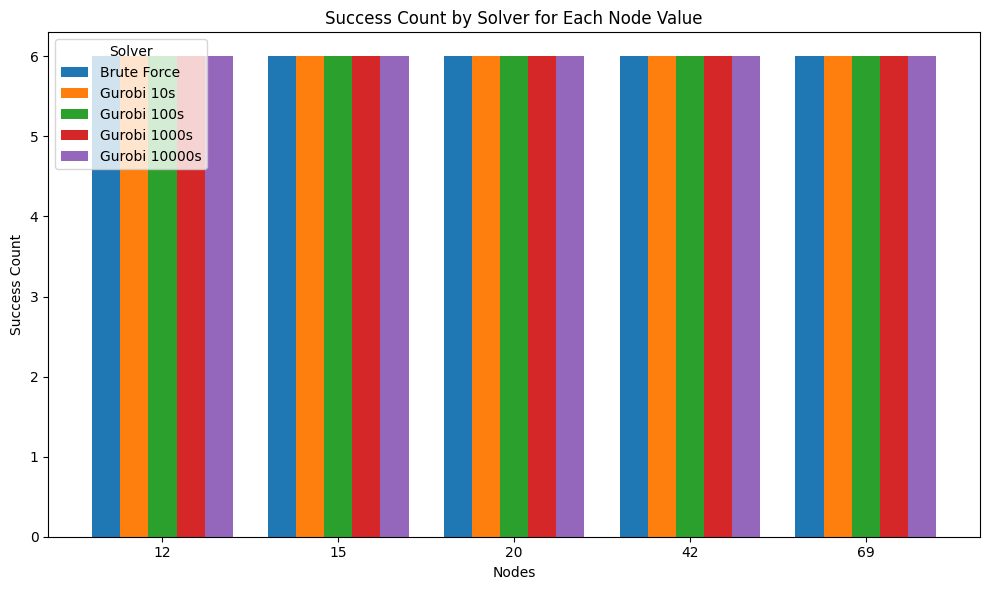

In [4]:
# Prepare data for plotting
records = []
for item in data:
    nodes = item["nodes"]
    for solver in item["solvers_results"]:
        success = solver["objective"] is not None and solver["execution_time"] is not None
        records.append({"nodes": nodes, "solver": solver["name"], "success": int(success)})

# Convert to DataFrame
df = pd.DataFrame(records)

# Group by nodes and solver to count successes
success_counts = df.groupby(["nodes", "solver"]).sum().reset_index()

# Pivot data for plotting
pivot_data = success_counts.pivot(index="nodes", columns="solver", values="success").fillna(0)

# Ensure legend order
solver_order = ["Brute Force", "Gurobi 10s", "Gurobi 100s", "Gurobi 1000s", "Gurobi 10000s"]
pivot_data = pivot_data[solver_order]

# Plot multi-bar chart
pivot_data.plot(kind="bar", figsize=(10, 6), width=0.8)
plt.title("Success Count by Solver for Each Node Value")
plt.xlabel("Nodes")
plt.ylabel("Success Count")
plt.legend(title="Solver", loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Box and Whisker Plot of Execution Time vs Nodes

No difference from previous benchmark.

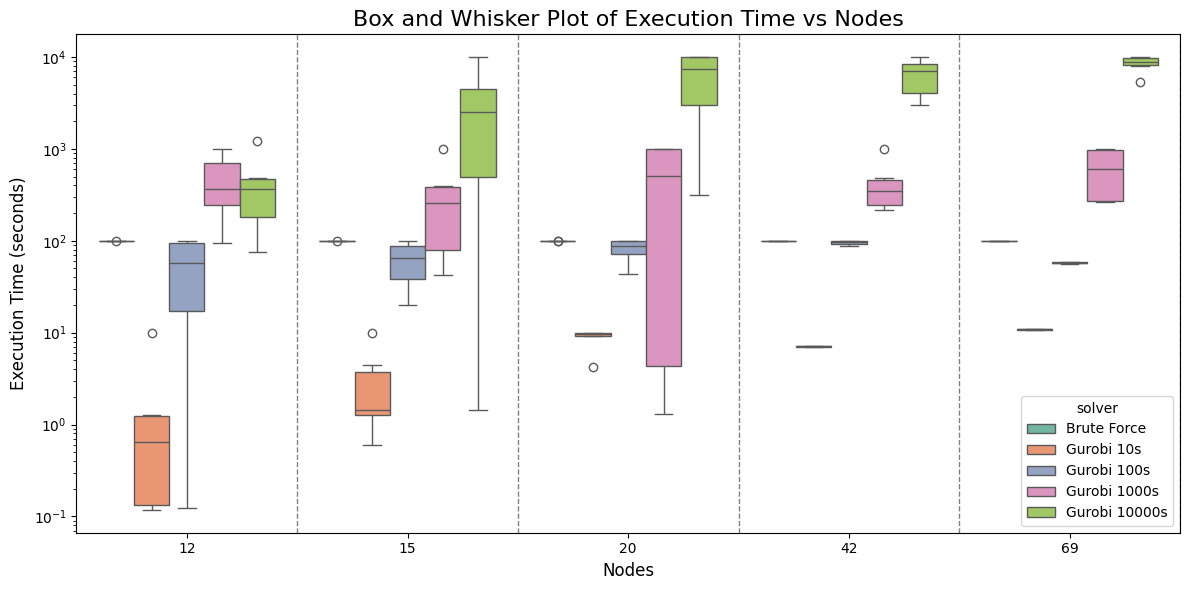

In [5]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    for result in dataset["solvers_results"]:
        plot_data.append({
            "nodes": dataset["nodes"],
            "solver": result["name"],
            "execution_time": result["execution_time"]
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for execution_time vs nodes
plt.figure(figsize=(12, 6))
sns.boxplot(x="nodes", y="execution_time", hue="solver", data=df_plot, palette="Set2")

# Add title and labels
plt.title('Box and Whisker Plot of Execution Time vs Nodes', fontsize=16)
plt.xlabel('Nodes', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

# Add vertical lines as guidelines to separate each "nodes" group
nodes = df_plot['nodes'].unique()
for node in nodes:
    plt.axvline(x=list(nodes).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

plt.yscale("log")

# Show the plot
plt.tight_layout()
plt.show()

### Box and Whisker Plot of Objective vs Nodes

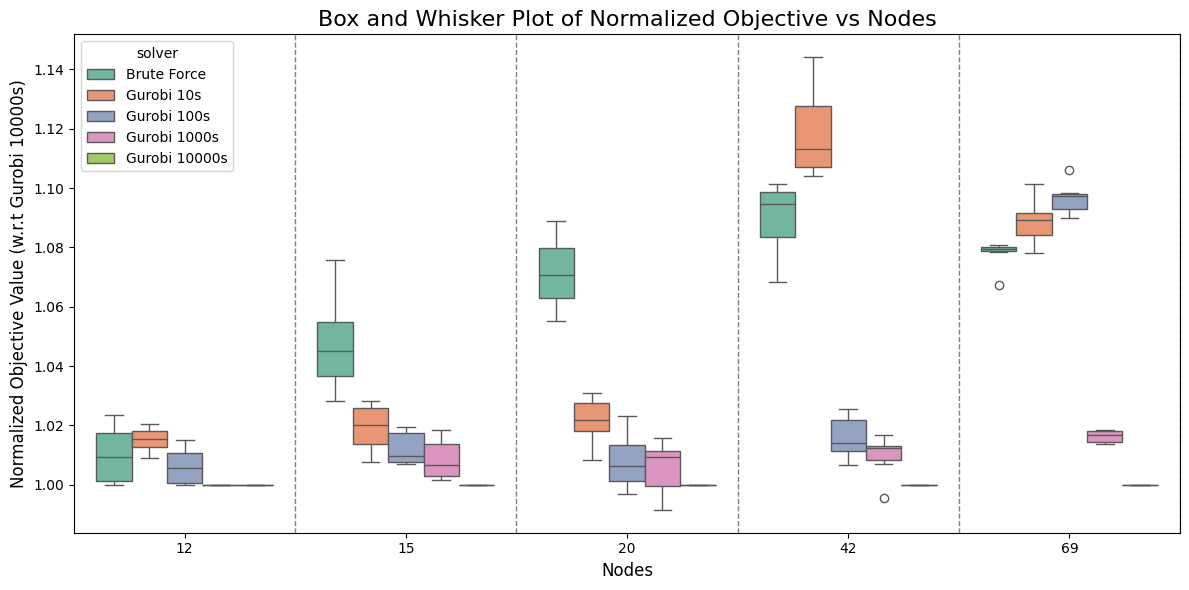

In [8]:
# Prepare data for plotting
plot_data = []
for dataset in data:
    # Extract objective value of Gurobi 10000s to normalize others
    gurobi_100s_objective = next(
        result["objective"] for result in dataset["solvers_results"] if result["name"] == "Gurobi 10000s"
    )
    
    for result in dataset["solvers_results"]:
        # Skip failed solvers where objective is None
        if result["objective"] is None:
            continue
        
        # Normalize the objective value
        normalized_objective = result["objective"] / gurobi_100s_objective if gurobi_100s_objective != 0 else 0
        plot_data.append({
            "nodes": dataset["nodes"],
            "solver": result["name"],
            "normalized_objective": normalized_objective
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Box and Whisker Plot for normalized objective vs nodes
plt.figure(figsize=(12, 6))
sns.boxplot(x="nodes", y="normalized_objective", hue="solver", data=df_plot, palette="Set2", hue_order=["Brute Force", "Gurobi 10s", "Gurobi 100s", "Gurobi 1000s", "Gurobi 10000s"])

# Add title and labels
plt.title('Box and Whisker Plot of Normalized Objective vs Nodes', fontsize=16)
plt.xlabel('Nodes', fontsize=12)
plt.ylabel('Normalized Objective Value (w.r.t Gurobi 10000s)', fontsize=12)

# Add vertical lines as guidelines to separate each "nodes" group
nodes = df_plot['nodes'].unique()
for node in nodes:
    plt.axvline(x=list(nodes).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()

# Summary

TODO